In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('Advertising.csv')

In [3]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [6]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [7]:
import seaborn as sns

<AxesSubplot:>

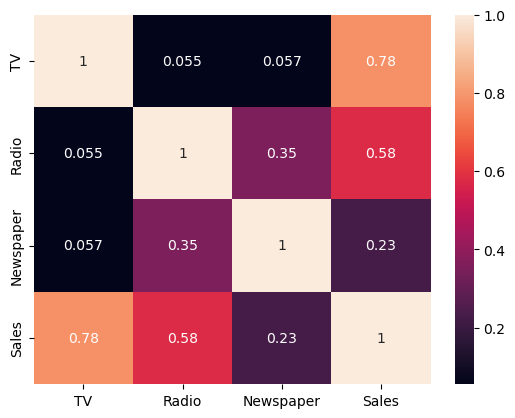

In [8]:
sns.heatmap(df.corr(),annot=True)

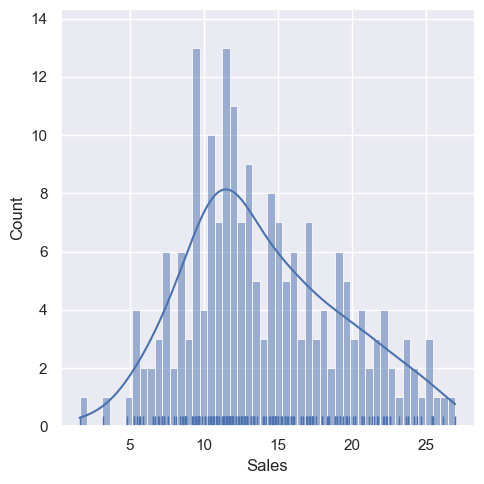

In [47]:
sns.set(style='darkgrid')
sns.displot(data=df,x='Sales',bins=50,rug=True,kde=True)

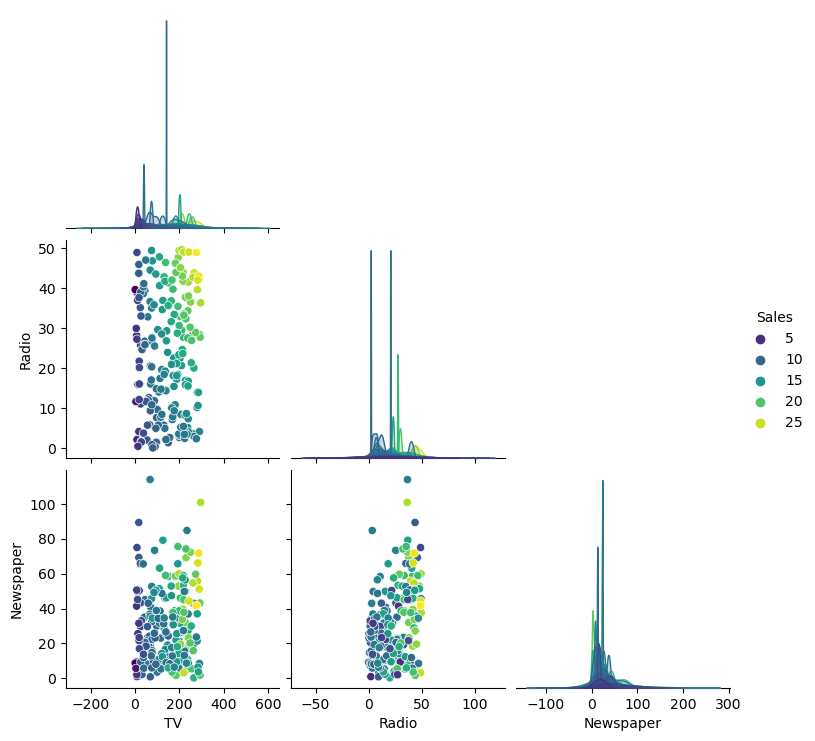

In [35]:
sns.pairplot(df,hue='Sales',palette='viridis',corner=True)

In [50]:
import matplotlib.pyplot as plt

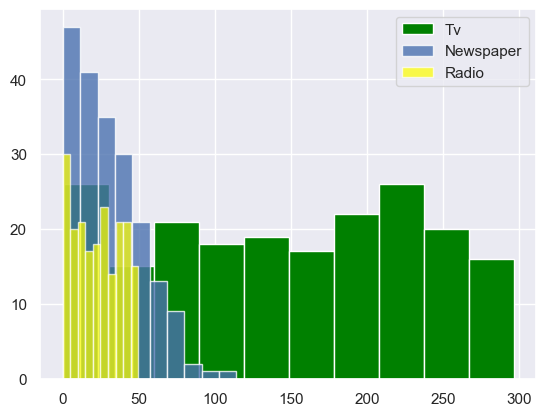

In [82]:
fig = plt.figure()
plt.hist(df['TV'],label="Tv",color='green')
plt.hist(df['Newspaper'],label="Newspaper",alpha=0.8)
plt.hist(df['Radio'],label="Radio",alpha=0.7,color='yellow')
plt.legend()

In [84]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


<AxesSubplot:>

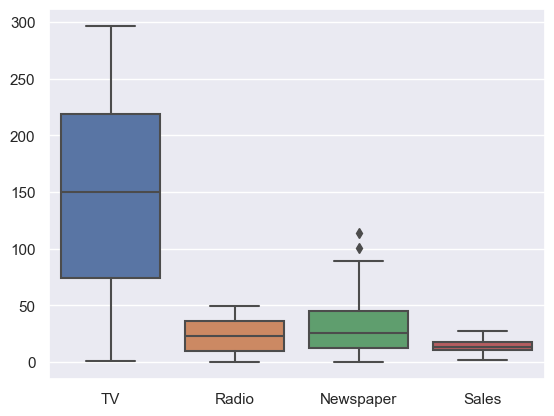

In [85]:
sns.boxplot(data=df)

In [94]:
x=df.iloc[:,:-1]

In [95]:
x.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [96]:
y=df.iloc[:,-1:]

In [97]:
y.head()

,Sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [100]:
from sklearn.model_selection import train_test_split

In [101]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [102]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((150, 3), (50, 3), (150, 1), (50, 1))

In [105]:
x_train.corr()

,TV,Radio,Newspaper
TV,1.000000,0.043265,0.015895
Radio,0.043265,1.000000,0.382034
Newspaper,0.015895,0.382034,1.000000


In [117]:
from sklearn.preprocessing import StandardScaler

In [118]:
scalar=StandardScaler()

In [119]:
x_train_scaled=scalar.fit_transform(x_train)
x_test_scaled=scalar.transform(x_test)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


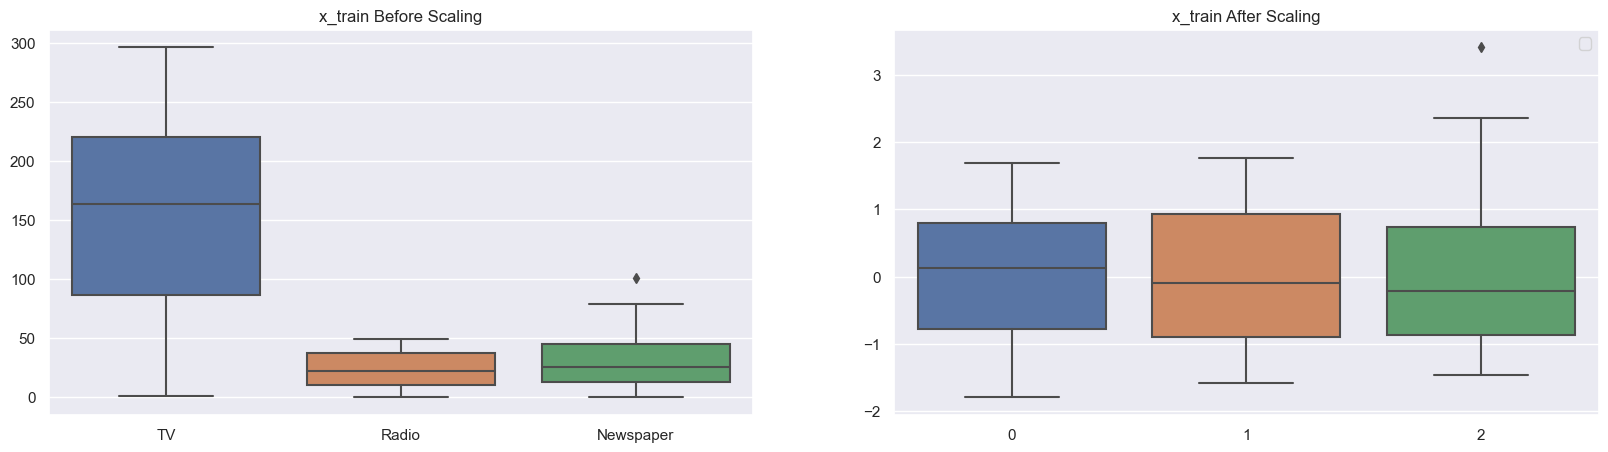

In [122]:
plt.subplots(figsize=(20, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=x_train)
plt.title('x_train Before Scaling')
plt.subplot(1, 2, 2)
sns.boxplot(data=x_train_scaled)
plt.title('x_train After Scaling')
plt.legend()

In [123]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor()

In [124]:
parameter={
 'criterion':['squared_error','friedman_mse','absolute_error','poisson'],
  'splitter':['best','random'],
  'max_depth':[1,2,3,4,5,6,7,8,10,11,12],
  'max_features':['auto', 'sqrt', 'log2']

}

In [125]:
from sklearn.model_selection import GridSearchCV
regressor_cv=GridSearchCV(regressor,param_grid=parameter,cv=5,scoring='neg_mean_squared_error')

In [126]:
regressor_cv.fit(x_train_scaled,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [127]:
regressor_cv.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 10,
 'max_features': 'auto',
 'splitter': 'random'}

In [142]:
y_pred=regressor_cv.predict(x_test_scaled)

In [145]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix

In [148]:
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

Mean absolute error 0.820916666666667
R2 Score 0.9616268215006961


In [150]:
import pickle
pickle.dump(scalar,open('Standarrd_scaler.pkl','wb'))
pickle.dump(regressor_cv,open('Descission_tree.pkl','wb'))